(URL) https://todayisbetterthanyesterday.tistory.com/9

(URL) https://todayisbetterthanyesterday.tistory.com/10

(URL) https://todayisbetterthanyesterday.tistory.com/6?category=821465

(URL) https://todayisbetterthanyesterday.tistory.com/7

(URL) https://data-newbie.tistory.com/382

(URL) https://data-newbie.tistory.com/383?category=805962

# 변수선택법 실습 이전단계_불필요한 변수 제거 및 가변수 추가 ~ 다중공선성 확인작업

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 데이터 불러오기

corolla = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ToyotaCorolla.csv")
corolla.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [4]:
# 데이터 수와 변수의 수 확인하기

nCar = corolla.shape[0]
nVar = corolla.shape[1]

print(corolla.shape) # 1436-row , 37-col
corolla.info()

(1436, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr

In [5]:
# Fuel_Type 변수 확인

corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [6]:
# 가변수 생성

dummy_p = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)

print(dummy_p.shape)
print(dummy_c.shape)
print(dummy_d.shape)

(1436,)
(1436,)
(1436,)


In [7]:
# boolean 인덱싱을 통해 boolean index 행렬 생성

p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

p_idx

array([False, False, False, ...,  True,  True,  True])

In [8]:
# boolean index 행렬을 사용하여 가변수에 대입 ( True = 1, False = 0 )

dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

dummy_p

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
# 행렬로 존재하는 가변수 -> 데이터프레임으로 전환

Fuel = pd.DataFrame({"Petrol" : dummy_p, "Diesel" : dummy_d, "CNG" : dummy_c})
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [10]:
# 불필요한 변수 삭제 및 가변수 붙이기

corolla_ = corolla.drop(["Id","Model","Fuel_Type"],axis = 1, inplace = False)
mlr_data = pd.concat((corolla_,Fuel),1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,1,0


In [11]:
# 연료 타입인 범주형 변수를 이진형 변수로 바꾸는 과정은 아래와 같이 get_dummies를 이용해서 one-hot encoding을 하시면 한번에 가능함

pd.get_dummies(corolla['Fuel_Type'], prefix = 'Fuel_Type')

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,1


In [12]:
# bias를 위한 상수항 추가

mlr_data = sm.add_constant(mlr_data, has_constant = "add")
mlr_data

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,7500,69,12,1998,20544,86,1,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,1,0,0
1432,1.0,10845,72,9,1998,19000,86,0,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0
1433,1.0,8500,71,10,1998,17016,86,0,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1434,1.0,7250,70,11,1998,16916,86,1,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [13]:
mlr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             1436 non-null   float64
 1   Price             1436 non-null   int64  
 2   Age_08_04         1436 non-null   int64  
 3   Mfg_Month         1436 non-null   int64  
 4   Mfg_Year          1436 non-null   int64  
 5   KM                1436 non-null   int64  
 6   HP                1436 non-null   int64  
 7   Met_Color         1436 non-null   int64  
 8   Automatic         1436 non-null   int64  
 9   cc                1436 non-null   int64  
 10  Doors             1436 non-null   int64  
 11  Cylinders         1436 non-null   int64  
 12  Gears             1436 non-null   int64  
 13  Quarterly_Tax     1436 non-null   int64  
 14  Weight            1436 non-null   int64  
 15  Mfr_Guarantee     1436 non-null   int64  
 16  BOVAG_Guarantee   1436 non-null   int64  


In [49]:
# 설명변수(X)와 타겟변수(Y)를 분리/학습데이터와 평가데이터를 분할

feature_columns = mlr_data.columns.difference(["Price"]) # Target column 빼기

X = mlr_data[feature_columns]
y = mlr_data.Price

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.8, test_size = 0.2)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1148, 37) (288, 37) (1148,) (288,)


In [15]:
feature_columns

Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic',
       'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider',
       'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders',
       'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color',
       'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps',
       'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio',
       'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'],
      dtype='object')

In [16]:
# train & 회귀모델 적합

full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

## R^2 = 0.913 >> 매우 높은 편
## 이렇게 변수가 많아질수록 변수 하나하나에 대한 신뢰도는 떨어짐
## Warnings를 보면 강한 다중공선성 문제가 있을 수 있다고 말하고 있음
## 그러므로 VIF를 통해 다중공선성을 확인해보자

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     340.6
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:20:35   Log-Likelihood:                -9669.0
No. Observations:                1148   AIC:                         1.941e+04
Df Residuals:                    1114   BIC:                         1.958e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -291.9854    125.572     -2.325      0.020    -538.370     -45.601
Age_08_04         -116.8450      3.887    -30.061      0.000    -124.472    -109.218
Airbag_1            27.5858    250.991      0.110      0.913    -464.882     520.054
Airbag_2           -84.4202    125.823     -0.671      0.502    -331.296     162.456
Airco              207.0504     88.970      2.327      0.020      32.483     381.618
Automatic          426.1555    150.530      2.831      0.005     130.802     721.509
Automatic_airco   2386.6153    192.135     12.422      0.000    2009.629    2763.602
BOVAG_Guarantee    468.2380    123.524      3.791      0.000     225.872     710.604
Backseat_Divider  -275.0441    126.170     -2.180      0.029    -522.602     -27.487
Boardcomputer     -226.4027    119.219     -1.899      0.058    -460.322       7.517
CD_Player          179.6586    102.682      1.750      0.080     -21.813     381.130
CNG              -1122.3840    231.436     -4.850      0.000   -1576.483    -668.285
Central_Lock      -229.4106    145.325     -1.579      0.115    -514.551      55.730
Cylinders           -0.0337      0.002    -15.000      0.000      -0.038      -0.029
Diesel            -109.0278    176.753     -0.617      0.537    -455.835     237.779
Doors               62.0972     39.660      1.566      0.118     -15.719     139.913
Gears              214.8608    212.647      1.010      0.313    -202.374     632.095
Guarantee_Period    67.9523     12.799      5.309      0.000      42.840      93.064
HP                  15.0424      3.653      4.118      0.000       7.876      22.209
KM                  -0.0176      0.001    -14.019      0.000      -0.020      -0.015
Met_Color           -8.3615     75.379     -0.111      0.912    -156.262     139.539
Metallic_Rim       149.0034     97.357      1.530      0.126     -42.020     340.027
Mfg_Month          -94.7441     10.305     -9.194      0.000    -114.964     -74.524
Mfg_Year             0.7185      0.836      0.859      0.390      -0.922       2.359
Mfr_Guarantee      283.4235     73.838      3.838      0.000     138.546     428.301
Mistlamps          -71.0550    111.413     -0.638      0.524    -289.659     147.549
Petrol            1231.4033    194.752      6.323      0.000     849.281    1613.525
Power_Steering     -88.3314    277.521     -0.318      0.750    -632.854     456.191
Powered_Windows    560.6935    145.455      3.855      0.000     275.298     846.089
Quarterly_Tax       16.0246      1.779      9.006      0.000      12.533      19.516
Radio              646.8563    663.394      0.975      0.330    -654.786    1948.499
Radio_cassette    -702.3911    663.788     -1.058      0.290   -2004.806     600.024
Sport_Model        350.1007     88.544      3.954      0.000     176.369     523.832
Tow_Bar           -199.

In [17]:
# VIF를 통한 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

## OLS와 VIF 검정을 모두 확인했을 때, P-value가 유의하고 VIF값이 매우 높아도 논리적으로 중요한 변수라고 생각하면 변수를 지우지 않고 살릴 필요가 있다.
## 이러한 과정을 통해 중요하지 않은 변수 중에서 P-value가 높고 VIF값이 높은 변수를 선택해서 제거해야한다.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


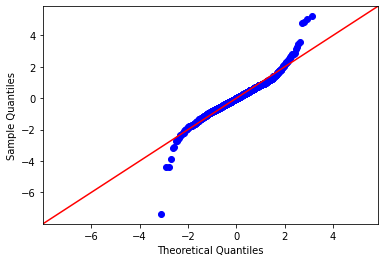

In [18]:
# 학습데이터의 잔차 확인

res = fitted_full_model.resid

# q-q plot을 통한 잔차의 정규분포 확인

fig = sm.qqplot(res,fit = True,line = '45')

## q-q plot : 잔차의 정규성을 확인할 때 사용하는 그래프 중 하나임 (statsmodels.api 라이브러리 내에 존재)
## q-q plot은 y=x 형태를 띄어야 정규성을 보이는 것임
## 해당 그래프는 완전한 정규성을 보이지 않는 것을 확인할 수 있음
## 보통 아래 그래프처럼 실제에서도 꼬리부분의 값이 정규성을 띄지 않는 경우가 많음
## 그래도 아래 그래프는 꼬리부분 약간의 데이터를 제외하고 정규성을 띄고 있다고 판단되어 양호하다는 판단이 가능함

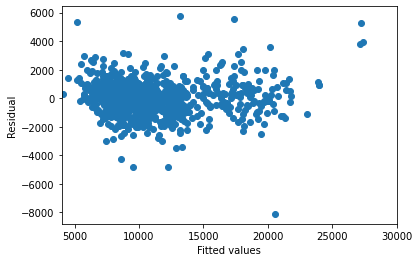

In [19]:
# 잔차패턴 확인

pred_y = fitted_full_model.predict(train_x)

import matplotlib.pyplot as plt 

plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.scatter(pred_y, res)
plt.show()

## 모든 변수를 사용해 학습된 모델의 예측값과 잔차간의 상관관계를 확인하기 위해 나타낸 산점도
## 특별한 경향이 발견되지 않으므로 잔차가 균등하게 나와있다고 판단가능함

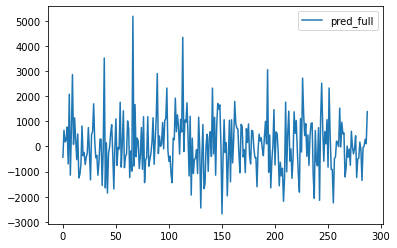

In [20]:
# 검증데이터에 대한 예측

pred_y2 = fitted_full_model.predict(test_x)

# 예측데이터 잔차

plt.plot(np.array(test_y - pred_y2), label = "pred_full")
plt.legend()
plt.show()

In [21]:
#MSE 구하기

from sklearn.metrics import mean_squared_error

mean_squared_error(y_true = test_y, y_pred = pred_y2)

1207429.3336388061

In [22]:
## 이러한 과정으로 데이터를 확인하고 변수를 제거해야하는지 확인하는 작업 필요
## 다중공선성/과적합 등 문제가 발생하면 변수를 가공하고,
## 범주형 변수는 가변수 생성을 통해 추가적인 변수로 변환할 필요가 있음
## 이 과정 후에 변수선택법을 적용하여 변수를 선택하고 축소하는 과정이 이어짐

# 변수선택법 실습_전진선택법/후진소거법/단계적선택법/MAPE 모델 성능 평가

## 0. 변수선택법 (전체 경우의 수를 찾는 방법)

In [23]:
# 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가된다.

def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}
    
print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb2ed7a6190>, 'AIC': 21778.67654311414}


In [24]:
# 전체 변수의 AIC test

processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'AIC': 19406.07665406668,
 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fb2ed80f9d0>}

In [50]:
import time
import itertools

# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수

def getBest(X,y,k):

  tic = time.time() # 시작 시간

  results = [] # 결과 저장 공간

  for combo in itertools.combinations(X.columns.difference(['const']),k): # 각 변수 조합을 고려한 경우의 수
    
    print(combo)

    combo = (list(combo)+['const']) # 상수항을 추가하여 combo를 결성

    print(combo)
    
    results.append(processSubset(X,y,feature_set=combo)) # 모델링된 것을 저장

    # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
    # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함

    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수

    print(best_model)

    toc = time.time() # 종료 시간

    print("Processed", models.shape[0], "models on", k, "predictors in", (toc - tic), "seconds.")

    return best_model
  
print(getBest(X=train_x, y=train_y, k=2))


('ABS', 'Age_08_04')
['ABS', 'Age_08_04', 'const']
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                20450.6
Name: 0, dtype: object
Processed 1 models on 2 predictors in 0.009121894836425781 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                20450.6
Name: 0, dtype: object


In [26]:
## 위의 함수는 전체 변수의 가능한 조합을 모두 확인하는 함수이다.
## 좋은 변수를 선택하여 모델을 만들 수 있겠지만,
## 문제는 변수의 총 수와 k가 증가할 때마다 시간이 기하급수적으로 증가하는 문제가 생긴다.
## 그렇기 때문에 "변수를 선택하는 방법 즉, 변수선택법"을 선정해야한다.

In [27]:
# 변수 선택에 따른 학습시간과 저장

models = pd.DataFrame(columns=['AIC','model'])
tic = time.time()
for i in range(1,4):
  models.loc[i] = getBest(X=train_x, y=train_y, k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

## 변수 조합 가능 경우의 수와 선별소요시간을 알려줌.

('ABS',)
['ABS', 'const']
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                21995.7
Name: 0, dtype: object
Processed 1 models on 1 predictors in 0.009807109832763672 seconds.
('ABS', 'Age_08_04')
['ABS', 'Age_08_04', 'const']
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                20401.2
Name: 0, dtype: object
Processed 1 models on 2 predictors in 0.011823892593383789 seconds.
('ABS', 'Age_08_04', 'Airbag_1')
['ABS', 'Age_08_04', 'Airbag_1', 'const']
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                  20403
Name: 0, dtype: object
Processed 1 models on 3 predictors in 0.01789689064025879 seconds.
Total elapsed time: 0.05499553680419922 seconds.


In [28]:
# 선택된 변수의 개수(1,2,3)별 가장 낮은 AIC를 보유한 모델들이 들어있는 DF

'''
AIC                 model
22004.3243891722    <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f3e67288fd0>
20436.8473355067    <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f3e66cc4410>
20438.4248618903    <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f3e66cecfd0>
'''
models

,AIC,model
1,21995.658604,<statsmodels.regression.linear_model.Regressio...
2,20401.188592,<statsmodels.regression.linear_model.Regressio...
3,20402.976796,<statsmodels.regression.linear_model.Regressio...


In [29]:
# 가장 AIC가 낮은 3번째 모델의 OLS 결과를 출력

models.loc[3, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1303.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:20:37   Log-Likelihood:                -10197.
No. Observations:                1148   AIC:                         2.040e+04
Df Residuals:                    1144   BIC:                         2.042e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ABS         -753.9516    147.951     -5.096      0.000   -1044.237    -463.667
Age_08_04   -177.0156      3.013    -58.759      0.000    -182.926    -171.105
Airbag_1     150.7962    328.223      0.459      0.646    -493.191     794.783
const       2.108e+04    383.363     54.983      0.000    2.03e+04    2.18e+04
==============================================================================
Omnibus:                      279.276   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2483.534
Skew:                           0.858   Prob(JB):                         0.00
Kurtosis:                       9.998   Cond. No.                         546.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# 모든 변수를 모델링한 것과 비교

print('full model Rsquared:', '{:.5f}'.format(fitted_full_model.rsquared))
print('full model AIC:', '{:.5f}'.format(fitted_full_model.aic))
print('full model MSE:', '{:.5f}'.format(fitted_full_model.mse_total))

print('full model Rsquared:', '{:.5f}'.format(models.loc[3,'model'].rsquared))
print('full model AIC:', '{:.5f}'.format(models.loc[3,'model'].aic))
print('full model MSE:', '{:.5f}'.format(models.loc[3,'model'].mse_total))

full model Rsquared: 0.90983
full model AIC: 19406.07665
full model MSE: 13444352.44260
full model Rsquared: 0.77359
full model AIC: 20402.97680
full model MSE: 13444352.44260


## 1. 전진선택법

In [53]:
### 전진선택법 (step=1)

def forward(X,y,predictors):
  # predictor - 현재 선택되어있는 변수
  # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류

  remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]

  tic = time.time()
  results = []

  for p in remaining_predictors:
    results.append(processSubset(X=X, y=y, feature_set=predictors+[p]+['const']))
    # print(results)

  # 데이터프레임으로 변환
  models = pd.DataFrame(results)
  # print(models)

  # AIC가 가장 낮은 것을 선택
  best_model = models.loc[models['AIC'].argmin()]
  # print(best_model)

  toc = time.time()

  print('Processed ', models.shape[0], 'models on', len(predictors)+1, 'predictors in', (toc-tic))
  print('Selected predictors:', best_model['model'].model.exog_names,'AIC:',best_model[0])

  return best_model

### 전진선택법 모델

def forward_model(X,y):

  Fmodels = pd.DataFrame(columns=['AIC','model'])
  tic = time.time()

  # 미리 정의된 데이터 변수
  predictors = []

  # 변수 1~10개 : 0-9 -> 1-10
  for i in range(1, len(X.columns.difference(['const']))+1):
    Forward_result = forward(X=X, y=y, predictors=predictors)
    if i > 1:
      if Forward_result['AIC'] > Fmodel_before:
        break
      Fmodels.loc[i] = Forward_result
      predictors = Fmodels.loc[i]['model'].model.exog_names
      Fmodel_before = Fmodels.loc[i]['AIC']
      predictors = [k for k in predictors if k != 'const']
  toc = time.time()
  print('Total elapsed time:',(toc-tic),'seconds.')

  return (Fmodels['model'][len(Fmodels['model'])])

In [54]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Processed  36 models on 1 predictors in 0.059047698974609375
Selected predictors: ['Mfg_Year', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb2ed464510>
Processed  36 models on 1 predictors in 0.07245707511901855
Selected predictors: ['Mfg_Year', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb2ed4622d0>


UnboundLocalError: ignored

In [ ]:
Forward_best_model.aic

In [ ]:
Forward_best_model.summary()

## 2. 후진선택법

In [59]:
### 후진소거법(step=1)

def backward(X,y,predictors):
  tic = time.time()
  results = []

  # 데이터 변수들이 미리 정의된 predictors 조합 확인

  for combo in itertools.combinations(predictors, len(predictors)-1):
    results.append(processSubset(X=X, y=y, feature_set=list(combo)+['const']))
  models = pd.DataFrame(results)

  # 가장 낮은 AIC를 가진 모델을 선택
  best_model = models.loc[models['AIC'].argmin()]
  
  toc = time.time()

  print('Processed', models.shape[0], 'models on', len(predictors)-1, 'predictors in', (toc-tic))
  print('Selected predictors :', best_model['model'].model.exog_names, 'AIC:', best_model[0])
  return best_model

def backward_medel(X,y):
  Bmodels = pd.DataFrame(columns=['AIC','model'], index=range(1,len(X.columns)))
  
  tic = time.time()

  predictors = X.columns.difference(['const'])
  Bmodel_before = processSubset(X,y,predictors)['AIC']

  while (len(predictors) > 1):
    Backward_result = backward(X=train_x, y=train_y, predictors=predictors)
    if Backward_result['AIC'] > Bmodel_before :
      break
    Bmodels.loc[len(predictors)-1] = Backward_result
    predictors = Bmodels.loc[len(predictors)-1]['model'].model.exog_names
    Bmodel_before = Backward_result['AIC']
    predictors = [k for k in predictors if k != 'const']

  toc = time.time()

  print('Total elapsed time:', (toc-tic), 'seconds.')
  return (Bmodels['model'].dropna().iloc[0])

In [60]:
Backward_best_model = backward_medel(X=train_x, y=train_y)

Processed 36 models on 35 predictors in 0.24874544143676758
Selected predictors : ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb2e8840950>
Processed 35 models on 34 predictors in 0.26634716987609863
Selected predictors : ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg

In [61]:
Backward_best_model.aic

19369.982267365613

In [62]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     489.3
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:09:56   Log-Likelihood:                -9660.0
No. Observations:                1148   AIC:                         1.937e+04
Df Residuals:                    1123   BIC:                         1.950e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -309.0308     98.936     -3.124      0.002    -503.152    -114.910
Age_08_04          -25.2253     10.074     -2.504      0.012     -44.991      -5.460
Airco              233.3342     84.698      2.755      0.006      67.151     399.517
Automatic          325.3482    145.603      2.234      0.026      39.664     611.033
Automatic_airco   2547.9082    172.150     14.801      0.000    2210.136    2885.680
BOVAG_Guarantee    668.6142    126.314      5.293      0.000     420.775     916.453
Backseat_Divider  -362.7118    114.988     -3.154      0.002    -588.327    -137.096
Boardcomputer     -323.0567    115.871     -2.788      0.005    -550.404     -95.709
CD_Player          150.1818     95.305      1.576      0.115     -36.815     337.178
CNG              -5.734e+05   6.06e+04     -9.464      0.000   -6.92e+05   -4.55e+05
Diesel           -5.726e+05   6.06e+04     -9.454      0.000   -6.91e+05   -4.54e+05
Guarantee_Period    78.6957     12.849      6.125      0.000      53.485     103.906
HP                  19.8635      3.185      6.237      0.000      13.615      26.112
KM                  -0.0167      0.001    -13.585      0.000      -0.019      -0.014
Metallic_Rim       269.2051     89.437      3.010      0.003      93.723     444.687
Mfg_Year          1143.9536    120.996      9.454      0.000     906.549    1381.358
Mfr_Guarantee      253.7005     71.778      3.535      0.000     112.867     394.534
Petrol           -5.713e+05   6.06e+04     -9.429      0.000    -6.9e+05   -4.52e+05
Powered_Windows    330.6524     82.131      4.026      0.000     169.505     491.800
Quarterly_Tax       16.1886      1.717      9.429      0.000      12.820      19.557
Radio             1371.0518    786.877      1.742      0.082    -172.864    2914.967
Radio_cassette   -1493.3177    786.725     -1.898      0.058   -3036.933      50.298
Sport_Model        313.5677     82.640      3.794      0.000     151.421     475.714
Tow_Bar           -190.8961     76.892     -2.483      0.013    -341.765     -40.028
Weight               9.5499      1.119      8.533      0.000       7.354      11.746
const            -1.717e+06   1.82e+05     -9.449      0.000   -2.07e+06   -1.36e+06
==============================================================================
Omnibus:                      115.572   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.245
Skew:                           0.112   Prob(JB):                    3.40e-173
Kurtosis:                       7.069   Cond. No.                     1.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.96e-20. 

## 3. 단계적 선택법

In [75]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns = ["AIC","model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    
    # 변수 1~10개 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1) :
        Forward_result = forward(X=X,y=y,predictors = predictors) # constant added
        print('forward')
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X,y=y,predictors = predictors)
        if Backward_result["AIC"] < Forward_result["AIC"]:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [k for k in predictors if k != "const"]
            print('backward')
        if Stepmodels.loc[i]["AIC"] > Smodel_before:
            break
        else :
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Stepmodels["model"][len(Stepmodels["model"])])

In [ ]:
Stepwise_best_model = Stepwise_model(X=train_x, y=train_y)

In [ ]:
Stepwise_best_model.aic

## 4. 성능평가

In [ ]:
# number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

In [ ]:
# 모델에 의해 예측된/추정된 값 = test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [ ]:
# MSE, RMSE, MAE, MAPE 4가지 지표를 통해 예측성능을 확인할 예정

perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],index =['MSE', 'RMSE','MAE', 'MAPE'])

# MAPE의 함수
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics  # 나머지는 sklearn에서 활용

# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)